# CNN for fNIRS data analysis for Human Activity Recognition (HAR)

In [1]:
% ls ../../../datasets/fNIRs_data_10subjects/

all-fNIRs-data.zip  P13-4-17-2018/  P16-4-18-2018/  P19-4-19-2018/
P11-4-17-2018/      P14-4-18-2018/  P17-4-18-2018/  P20-4-19-2018/
P12-4-17-2018/      P15-4-18-2018/  P18-4-19-2018/


In [2]:
% ls ../../../datasets/fNIRs_data_10subjects/P12-4-17-2018/

1. Right Hand/  2. Both Hands/  3. Left Hand/  4. Right Leg/  5. Left Leg/


In [3]:
% ls ../../../datasets/fNIRs_data_10subjects/P12-4-17-2018/1.\ Right\ Hand

2018-04-17_006/
fNIR_data.txt
head20180417-145130.txt
NIRS-2018-04-17_006_deoxyhb_T141to2511_C1to20.txt
NIRS-2018-04-17_006_oxyhb_T141to2511_C1to20.txt
Processed/
r_hand20180417-145128.txt
r_lower_arm20180417-145129.txt
r_upper_arm20180417-145129.txt


In [4]:
import numpy as np
import os
import pandas as pd

# % find ../../datasets/fNIRs_data/ | grep fNIR_data # NOT WORKING!!
def find_all(name, path):
    result = []
    for root, dirs, files in os.walk(path):
        if name in files:
            result.append(os.path.join(root, name))
    return result

allpaths = find_all(name='fNIR_data.txt', path='/home/arasdar/datasets/fNIRs_data_10subjects/')
allpaths = sorted(allpaths, reverse=False)
# print(allpaths, len(allpaths))
allpaths, len(allpaths)

(['/home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/1. Right Hand/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/2. Both Hands/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/3. Left hand/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/5. Left Leg/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/1. Right Hand/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/2. Both Hands/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/3. Left Hand/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/4. Right Leg/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/5. Left Leg/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data_10subjects/P13-4-17-2018/1. Right Hand/fNIR_data.txt',
  '/home/arasdar/datasets/fNIRs_data_10subjects/P13-4-17-2018/2. Both Hands/fNIR_data.t

In [6]:
# df: data frame object
df = []
for each_idx in range(len(allpaths)):
    file = pd.read_csv(filepath_or_buffer=allpaths[each_idx], names=['time', 'sample', 
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel',
                       'channel', 'channel', 'channel', 'channel', 'channel'],
                         header=None)
    df.append(file)
    
for each in range(len(df)):
    print(df[each].shape, allpaths[each])
    df[each]=df[each].drop(axis=1, columns=None, index=None, labels=['time', 'sample'])
    df[each] = df[each].dropna()
    df[each]['channel.39'] = df[each]['channel.39'].astype(str).str[1:-1].astype(float)
print(len(df))

/home/arasdar/anaconda3/envs/arasdar-DL-env/lib/python3.6/site-packages/pandas/io/parsers.py:709: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


(2388, 42) /home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/1. Right Hand/fNIR_data.txt
(1244, 42) /home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/2. Both Hands/fNIR_data.txt
(2389, 42) /home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/3. Left hand/fNIR_data.txt
(1201, 42) /home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/5. Left Leg/fNIR_data.txt
(2372, 42) /home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/1. Right Hand/fNIR_data.txt
(1210, 42) /home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/2. Both Hands/fNIR_data.txt
(2378, 42) /home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/3. Left Hand/fNIR_data.txt
(1202, 42) /home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/4. Right Leg/fNIR_data.txt
(1222, 42) /home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/5. Left Leg/fNIR_data.txt
(2405, 42) /home/arasdar/datasets/fNIRs_data_10subjects/P13-4-17-2018/1. Right Hand/fNIR_data.txt
(1196, 42) /home/arasdar/da

In [7]:
data, labels = [], []
for each in range(0, len(df), 1):
    dfmat = df[each].as_matrix()
    label = allpaths[each][59:60]
    print(dfmat.dtype, dfmat.shape, label, allpaths[each])
    data.append(dfmat)
    labels.append(label)
len(data), len(labels)

float64 (2387, 40) 1 /home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/1. Right Hand/fNIR_data.txt
float64 (1243, 40) 2 /home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/2. Both Hands/fNIR_data.txt
float64 (2388, 40) 3 /home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/3. Left hand/fNIR_data.txt
float64 (1200, 40) 5 /home/arasdar/datasets/fNIRs_data_10subjects/P11-4-17-2018/5. Left Leg/fNIR_data.txt
float64 (2371, 40) 1 /home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/1. Right Hand/fNIR_data.txt
float64 (1209, 40) 2 /home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/2. Both Hands/fNIR_data.txt
float64 (2377, 40) 3 /home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/3. Left Hand/fNIR_data.txt
float64 (1201, 40) 4 /home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/4. Right Leg/fNIR_data.txt
float64 (1221, 40) 5 /home/arasdar/datasets/fNIRs_data_10subjects/P12-4-17-2018/5. Left Leg/fNIR_data.txt
float64 (2404, 40) 1 /home/arasdar/

(48, 48)

In [8]:
# This is very much like a convolution for extracting the windows
# size/width, stride/overlap, padding, dilation, num filters/out channel
def minibatching(X, Y, stride, width):
    Xmb, Ymb = [], []
    print(len(X), len(Y))
    # 1st and 1st
    for eachX in range(len(X)):
        num_mb = ((X[eachX].shape[0]-width)//stride)+1
        for each in range(num_mb):
            # The max is (num_mb-1)*stride+width==X[idx].shape[0]
            # The last each is (num_mb-1)
            # each = ((each-1)*stride)+width
            each *= stride
            Xmb.append(X[eachX][each:each+width])
            # There is only one label for one image signal or signal window or temporal window
            #Ymb.append(Y[eachX][each:each+1])
            Ymb.append(Y[eachX])
    return Xmb, Ymb

In [9]:
# Width is based on the sampling rate which is roughly about 233 points per window
# for 10sec rest and 20 sec activity
width = 250
Xmb, Ymb = minibatching(X=data, Y=labels, stride=1, width=width)
# for eachX, eachY in zip(Xmb, Ymb):
#     print(eachX.shape, eachY)
print(len(Xmb), len(Ymb))
print(Xmb[0].shape, Xmb[0].dtype)
print(Ymb[0])

48 48
69615 69615
(250, 40) float64
1


In [10]:
# Conversion from python list to numpy array
X, Y=np.array(object=Xmb, dtype=float), np.array(object=Ymb, dtype=int)
print(X.shape, X.dtype, Y.shape, Y.dtype)

(69615, 250, 40) float64 (69615,) int64


In [11]:
# Now I should devide the data into train and test
# Train and valid split
from sklearn.model_selection import train_test_split

# 30% of the training data/ entire training data is assigned to validation.
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.30)
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)
print(Xtrain.dtype, Xtest.dtype, Ytrain.dtype, Ytest.dtype)

(48730, 250, 40) (20885, 250, 40) (48730,) (20885,)
float64 float64 int64 int64


In [12]:
# # standardizing/normalizing the train and test data
# def standardize(train, test):
# """ Standardize data """
# # Standardize train and test
# X_train = (train - np.mean(train, axis=0)[None,:,:]) / np.std(train, axis=0)[None,:,:]
# X_test = (test - np.mean(test, axis=0)[None,:,:]) / np.std(test, axis=0)[None,:,:]
# return X_train, X_test

Xtrain = (Xtrain - Xtrain.mean(axis=0))/ Xtrain.std(axis=0)
Xtest = (Xtest - Xtest.mean(axis=0))/ Xtest.std(axis=0)
print(Xtrain.shape, Xtrain.dtype)
print(Xtest.shape, Xtest.dtype)

(48730, 250, 40) float64
(20885, 250, 40) float64


In [13]:
print(Xtrain.mean(axis=0), Xtrain.std(axis=0))

[[ 8.68949439e-18  3.25070021e-17 -2.16747522e-17 ...  4.37277047e-17
   2.42743099e-17 -1.33030828e-17]
 [ 4.39851543e-17  1.56019029e-17  2.89801701e-18 ... -8.30764875e-17
  -6.92869844e-17  1.40754317e-17]
 [-1.14344086e-16  1.09359132e-18 -5.98638725e-17 ...  5.06788446e-17
   1.62519062e-16  8.23314784e-17]
 ...
 [ 5.03507672e-18 -5.63199531e-18 -2.04273746e-17 ...  8.30195296e-17
   1.34001390e-16  2.35896762e-17]
 [-5.93227727e-17  5.95916139e-17 -5.92020219e-17 ...  6.84884349e-17
  -4.15109040e-18  3.57558796e-17]
 [-4.77352613e-17  1.46541237e-17 -4.03284584e-17 ...  2.98664347e-17
  -6.25124140e-17  6.94886153e-17]] [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [14]:
print(Xtest.mean(axis=0), Xtest.std(axis=0))

[[ 1.46027419e-17 -9.85778107e-17  3.31179767e-17 ...  2.99430632e-17
  -9.21190079e-17 -2.56172600e-17]
 [ 8.02326843e-17  3.79288546e-17 -5.03573987e-17 ... -3.43711971e-17
  -1.73473344e-16  5.13567854e-17]
 [ 5.65158539e-17 -6.29347876e-17  5.31801347e-17 ...  1.40086915e-17
   8.66223806e-17  5.50194317e-17]
 ...
 [ 7.00899717e-18 -2.68718094e-17  1.29813963e-17 ... -2.73834635e-17
   6.91596914e-17 -4.79014588e-17]
 [-3.38276477e-17  8.98065970e-17  5.65025642e-17 ... -1.78892891e-17
  -1.05695784e-16 -8.12745981e-17]
 [ 5.93651694e-17  8.28374690e-17  9.09016697e-19 ... -1.16869778e-17
   1.01554708e-16 -9.11143052e-18]] [[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [15]:
# Onehotencoding of the output labels
def onehot(labels, n_class):
	""" One-hot encoding """
	expansion = np.eye(n_class)
	y = expansion[:, labels-1].T
	assert y.shape[1] == n_class, "Wrong number of labels!"

	return y

print(Y.max(axis=0), Ytrain.max(axis=0), Ytest.max(axis=0))
# # assert Y.max(axis=0) == Ytrain.max(axis=0) == Ytest.max(axis=0), 'wrong labels'
Ytrain=onehot(labels=Ytrain, n_class=Ytrain.max(axis=0))
Ytest=onehot(labels=Ytest, n_class=Ytest.max(axis=0))
print(Ytrain.shape, Ytrain.dtype, Ytest.shape, Ytest.dtype)

5 5 5
(48730, 5) float64 (20885, 5) float64


In [16]:
# Now separating train and validation set
# 30% of the training data/ entire training data is assigned to validation.
Xtrain, Xvalid, Ytrain, Yvalid = train_test_split(Xtrain, Ytrain, test_size=0.30)
print(Xtrain.shape, Xvalid.shape, Xtest.shape, Xtrain.dtype, Xvalid.dtype, Xtest.dtype)
print(Ytrain.shape, Yvalid.shape, Ytest.shape, Ytrain.dtype, Yvalid.dtype, Ytest.dtype)

(34111, 250, 40) (14619, 250, 40) (20885, 250, 40) float64 float64 float64
(34111, 5) (14619, 5) (20885, 5) float64 float64 float64


In [17]:
# In this one we should define and detect GPUs for tensorflow
# GPUs or CPU
import tensorflow as tf

# Check TensorFlow Version
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.7.0
Default GPU Device: /device:GPU:0


In [18]:
# now I can design the actual input and output tensors
N, W, Cin = Xvalid.shape[0], Xvalid.shape[1], Xvalid.shape[2]
X = tf.placeholder(dtype=tf.float32, name=None, shape=[N, W, Cin])
print(X.shape, X.dtype, Xtrain.shape, Xtrain.dtype, Xvalid.shape, Xvalid.dtype, Xtest.shape, Xtest.dtype)

(14619, 250, 40) <dtype: 'float32'> (34111, 250, 40) float64 (14619, 250, 40) float64 (20885, 250, 40) float64


In [19]:
# This is the output tensor for labels
N, Cout = Yvalid.shape[0], Yvalid.shape[1]
Y = tf.placeholder(dtype=tf.float32, name=None, shape=[N, Cout])
print(Y.shape, Y.dtype, Ytrain.shape, Ytrain.dtype, Yvalid.shape, Yvalid.dtype, Ytest.shape, Ytest.dtype)

(14619, 5) <dtype: 'float32'> (34111, 5) float64 (14619, 5) float64 (20885, 5) float64


In [20]:
# print(X.shape, X.dtype)
# Wwidth, Wchannels, Wnumber = X.shape[1].value//2, X.shape[2].value, X.shape[2].value*2
# shape = [Wwidth, Wchannels, Wnumber]
# initial_value=tf.random_normal(dtype=X.dtype, mean=0.0, name=None, shape=shape, stddev=1.0)
# Wconv = tf.Variable(dtype=X.dtype, initial_value=initial_value, name=None, trainable=True)
# print(Wconv.shape, Wconv.dtype)
# Xconv = tf.nn.conv1d(data_format='NWC', filters=Wconv, name=None, padding='SAME', stride=2, use_cudnn_on_gpu=True, 
#                      value=X)
# Xconv = tf.maximum(name=None, x=(-0.1*Xconv), y=Xconv)
# print(Xconv.shape, Xconv.dtype)

In [21]:
print(X.shape, X.dtype)

(14619, 250, 40) <dtype: 'float32'>


In [25]:
# This is the multiplication layer
# this part is flatening the input
shape = [X.shape[0].value, X.shape[1].value * X.shape[2].value]
X_reshaped = tf.reshape(name=None, shape=shape, tensor=X)
print(X_reshaped.shape, X_reshaped.dtype)
# their first axis or dimension stay the same
shape = [X_reshaped.shape[1].value, Y.shape[1].value]
initial_value = tf.random_normal(dtype=X_reshaped.dtype, mean=0.0, name=None, shape=shape, stddev=1.0)
W = tf.Variable(dtype=X_reshaped.dtype, initial_value=initial_value, name=None, trainable=True)
print(W.shape, W.dtype)
# The actual multiplication
# Y_ = Xconv_reshaped @ W
Y_ = tf.matmul(a=X_reshaped, b=W, name=None)
print(Y_.shape, Y_.dtype)
print(Y.shape, Y.dtype)

(14619, 10000) <dtype: 'float32'>
(10000, 5) <dtype: 'float32_ref'>
(14619, 5) <dtype: 'float32'>
(14619, 5) <dtype: 'float32'>


In [26]:
# Now I need to calculate the loss
loss_tensor = tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=Y_, name=None)
print(loss_tensor.shape, loss_tensor.dtype)
loss = tf.reduce_mean(axis=0, input_tensor=loss_tensor, name=None)
print(loss)

(14619,) <dtype: 'float32'>
Tensor("Mean_1:0", shape=(), dtype=float32)


In [27]:
# Backprop and SGD now using adam
opt = tf.train.AdamOptimizer().minimize(loss)
print(opt)

name: "Adam_1"
op: "NoOp"
input: "^Adam_1/update_Variable_1/ApplyAdam"
input: "^Adam_1/Assign"
input: "^Adam_1/Assign_1"



In [28]:
print(Y_.shape, Y_.dtype, Y.shape, Y.dtype)

(14619, 5) <dtype: 'float32'> (14619, 5) <dtype: 'float32'>


In [29]:
# Accuracy
# tf.argmax(
#     input,
#     axis=None,
#     name=None,
#     dimension=None,
#     output_type=tf.int64
# )
# Y_NxCout, N:axis 1, Cout: axis 2
Y_argmax = tf.argmax(axis=1, name=None, input=Y_)
print(Y_argmax.shape, Y_argmax.dtype)
Yargmax = tf.argmax(axis=1, name=None, input=Y)
print(Yargmax.shape, Yargmax.dtype)

acc_tensor = tf.equal(name=None, x=Y_argmax, y=Yargmax)
print(acc_tensor.shape, acc_tensor.dtype)
# cast bool to int datatype for equal
acc_tensor = tf.cast(dtype=tf.float32, name=None, x=acc_tensor)
print(acc_tensor.shape, acc_tensor.dtype)
acc = tf.reduce_mean(axis=0, input_tensor=acc_tensor)
print(acc.shape, acc.dtype)

(14619,) <dtype: 'int64'>
(14619,) <dtype: 'int64'>
(14619,) <dtype: 'bool'>
(14619,) <dtype: 'float32'>
() <dtype: 'float32'>


In [30]:
def get_batches(X, Y, batch_size):
    """ Return a generator for batches """
    n_batches = len(X) // batch_size
    X, Y = X[:n_batches*batch_size], Y[:n_batches*batch_size]

    # Loop over batches and yield
    for b in range(0, len(X), batch_size):
        yield X[b:b+batch_size], Y[b:b+batch_size]

In [36]:
# We should save the after training and validation
saver = tf.train.Saver() 
train_loss_mean, valid_loss_mean = [], []
train_acc_mean, valid_acc_mean = [], []

# now that we can calculate loss and optimize, we can start a session for calculating the error.
with tf.Session() as sess:
    sess.run(fetches=tf.global_variables_initializer())
    
    # for every epoch start feeding the arrays into the tensors in the model
    for epoch in range(0, 1000, 1):
        train_loss, valid_loss = [], []
        train_acc, valid_acc = [], []
        
        # Training minibatches and feed them into the tensor
        for Xarr, Yarr in get_batches(X=Xtrain, Y=Ytrain, batch_size=Xvalid.shape[0]):
            # X_NxWxCin, Y_NxCout
            feed_dict = {X:Xarr, Y:Yarr}
            lossarr, _, accarr = sess.run(feed_dict=feed_dict, fetches=[loss, opt, acc])
            train_loss.append(lossarr)
            train_acc.append(accarr)
            
        # Validation now which is one batch on every iteration
        for Xarr, Yarr in get_batches(X=Xvalid, Y=Yvalid, batch_size=Xvalid.shape[0]): 
            # X_NxWxCin, Y_NxCout
            feed_dict = {X:Xarr, Y:Yarr}
            lossarr, accarr = sess.run(feed_dict=feed_dict, fetches=[loss, acc])
            valid_loss.append(lossarr)
            valid_acc.append(accarr)
        
        # printing out train and validation loss
        print('epoch:', epoch+1, 'train_loss:', np.mean(train_loss), 'valid_loss:', np.mean(valid_loss),
             'train_acc:', np.mean(train_acc), 'valid_acc:', np.mean(valid_acc))
        
        # Every epoch, for drawing the plot and their learning curve
        train_loss_mean.append(np.mean(train_loss))
        valid_loss_mean.append(np.mean(valid_loss))
        train_acc_mean.append(np.mean(train_acc))
        valid_acc_mean.append(np.mean(valid_acc))
        
    # After all epochs and at the end of training and validation
    saver.save(sess,'checkpoints/mlp-fnirs-har-10subjects.ckpt')

epoch: 1 train_loss: 125.02435 valid_loss: 117.50005 train_acc: 0.1870853 valid_acc: 0.18311787
epoch: 2 train_loss: 115.43851 valid_loss: 108.26608 train_acc: 0.17969766 valid_acc: 0.1803817
epoch: 3 train_loss: 106.304214 valid_loss: 99.45154 train_acc: 0.17843218 valid_acc: 0.17135236
epoch: 4 train_loss: 97.82645 valid_loss: 91.788666 train_acc: 0.17306244 valid_acc: 0.17504618
epoch: 5 train_loss: 90.42556 valid_loss: 85.019714 train_acc: 0.17932144 valid_acc: 0.19625145
epoch: 6 train_loss: 83.86877 valid_loss: 79.18455 train_acc: 0.19642246 valid_acc: 0.18845338
epoch: 7 train_loss: 78.220566 valid_loss: 74.56789 train_acc: 0.17767973 valid_acc: 0.16314386
epoch: 8 train_loss: 73.8915 valid_loss: 70.89448 train_acc: 0.16529858 valid_acc: 0.1689582
epoch: 9 train_loss: 70.22577 valid_loss: 67.32956 train_acc: 0.16694027 valid_acc: 0.16683768
epoch: 10 train_loss: 66.5884 valid_loss: 63.756626 train_acc: 0.16868459 valid_acc: 0.1738149
epoch: 11 train_loss: 62.958088 valid_loss: 6

epoch: 87 train_loss: 4.722401 valid_loss: 4.627687 train_acc: 0.45300636 valid_acc: 0.45796567
epoch: 88 train_loss: 4.67977 valid_loss: 4.5866404 train_acc: 0.45502427 valid_acc: 0.45933375
epoch: 89 train_loss: 4.6384087 valid_loss: 4.5465455 train_acc: 0.45659757 valid_acc: 0.46227512
epoch: 90 train_loss: 4.5982027 valid_loss: 4.5073795 train_acc: 0.45841026 valid_acc: 0.46412203
epoch: 91 train_loss: 4.5590506 valid_loss: 4.4691143 train_acc: 0.460223 valid_acc: 0.46562693
epoch: 92 train_loss: 4.520865 valid_loss: 4.4317365 train_acc: 0.46254873 valid_acc: 0.46720022
epoch: 93 train_loss: 4.4835835 valid_loss: 4.3952594 train_acc: 0.46412203 valid_acc: 0.46938914
epoch: 94 train_loss: 4.44716 valid_loss: 4.3596125 train_acc: 0.46603733 valid_acc: 0.4716465
epoch: 95 train_loss: 4.411551 valid_loss: 4.324687 train_acc: 0.46785006 valid_acc: 0.47287777
epoch: 96 train_loss: 4.376711 valid_loss: 4.290455 train_acc: 0.4701758 valid_acc: 0.47486147
epoch: 97 train_loss: 4.3425922 val

epoch: 172 train_loss: 2.740621 valid_loss: 2.6920228 train_acc: 0.5775703 valid_acc: 0.5834873
epoch: 173 train_loss: 2.7269971 valid_loss: 2.6787853 train_acc: 0.5788015 valid_acc: 0.5846501
epoch: 174 train_loss: 2.7135153 valid_loss: 2.6656876 train_acc: 0.5796908 valid_acc: 0.585813
epoch: 175 train_loss: 2.700173 valid_loss: 2.6527245 train_acc: 0.58071685 valid_acc: 0.58724946
epoch: 176 train_loss: 2.6869693 valid_loss: 2.6398952 train_acc: 0.5818455 valid_acc: 0.5888228
epoch: 177 train_loss: 2.6739016 valid_loss: 2.627198 train_acc: 0.5826322 valid_acc: 0.59012246
epoch: 178 train_loss: 2.6609678 valid_loss: 2.6146314 train_acc: 0.58406866 valid_acc: 0.5909433
epoch: 179 train_loss: 2.648168 valid_loss: 2.6021936 train_acc: 0.5849922 valid_acc: 0.59176415
epoch: 180 train_loss: 2.6354992 valid_loss: 2.5898843 train_acc: 0.5861892 valid_acc: 0.59306383
epoch: 181 train_loss: 2.6229582 valid_loss: 2.5776997 train_acc: 0.58735204 valid_acc: 0.5940215
epoch: 182 train_loss: 2.610

epoch: 257 train_loss: 1.9463475 valid_loss: 1.9219377 train_acc: 0.6538409 valid_acc: 0.662152
epoch: 258 train_loss: 1.9400806 valid_loss: 1.9158943 train_acc: 0.65462756 valid_acc: 0.662836
epoch: 259 train_loss: 1.933862 valid_loss: 1.9099003 train_acc: 0.65555096 valid_acc: 0.66358846
epoch: 260 train_loss: 1.9276899 valid_loss: 1.9039524 train_acc: 0.65613246 valid_acc: 0.66454613
epoch: 261 train_loss: 1.9215662 valid_loss: 1.8980495 train_acc: 0.6565087 valid_acc: 0.66488814
epoch: 262 train_loss: 1.9154875 valid_loss: 1.8921951 train_acc: 0.65736365 valid_acc: 0.6655722
epoch: 263 train_loss: 1.9094553 valid_loss: 1.8863833 train_acc: 0.6581504 valid_acc: 0.6661878
epoch: 264 train_loss: 1.9034686 valid_loss: 1.8806169 train_acc: 0.658766 valid_acc: 0.66639304
epoch: 265 train_loss: 1.8975263 valid_loss: 1.8748938 train_acc: 0.659621 valid_acc: 0.6673507
epoch: 266 train_loss: 1.891628 valid_loss: 1.8692145 train_acc: 0.6601683 valid_acc: 0.6681716
epoch: 267 train_loss: 1.885

epoch: 342 train_loss: 1.5415852 valid_loss: 1.5325813 train_acc: 0.70425475 valid_acc: 0.7087352
epoch: 343 train_loss: 1.5379608 valid_loss: 1.5290922 train_acc: 0.70456254 valid_acc: 0.7091456
epoch: 344 train_loss: 1.5343556 valid_loss: 1.5256231 train_acc: 0.704802 valid_acc: 0.70941925
epoch: 345 train_loss: 1.5307696 valid_loss: 1.5221715 train_acc: 0.70524657 valid_acc: 0.70989805
epoch: 346 train_loss: 1.5272017 valid_loss: 1.5187371 train_acc: 0.7056912 valid_acc: 0.7101033
epoch: 347 train_loss: 1.5236533 valid_loss: 1.5153215 train_acc: 0.7061701 valid_acc: 0.7103769
epoch: 348 train_loss: 1.5201225 valid_loss: 1.5119238 train_acc: 0.70668304 valid_acc: 0.7109925
epoch: 349 train_loss: 1.5166104 valid_loss: 1.5085428 train_acc: 0.7072303 valid_acc: 0.71140295
epoch: 350 train_loss: 1.5131161 valid_loss: 1.5051802 train_acc: 0.7077775 valid_acc: 0.71208704
epoch: 351 train_loss: 1.5096397 valid_loss: 1.5018343 train_acc: 0.70825636 valid_acc: 0.7121554
epoch: 352 train_loss:

epoch: 426 train_loss: 1.2896827 valid_loss: 1.2901318 train_acc: 0.73760176 valid_acc: 0.7404747
epoch: 427 train_loss: 1.2871885 valid_loss: 1.2877288 train_acc: 0.738149 valid_acc: 0.7408168
epoch: 428 train_loss: 1.2847037 valid_loss: 1.2853361 train_acc: 0.7386278 valid_acc: 0.7412956
epoch: 429 train_loss: 1.2822282 valid_loss: 1.2829518 train_acc: 0.73883307 valid_acc: 0.7416376
epoch: 430 train_loss: 1.2797623 valid_loss: 1.2805767 train_acc: 0.73907244 valid_acc: 0.742048
epoch: 431 train_loss: 1.2773055 valid_loss: 1.27821 train_acc: 0.73944867 valid_acc: 0.7425268
epoch: 432 train_loss: 1.2748572 valid_loss: 1.2758529 train_acc: 0.73992753 valid_acc: 0.74293727
epoch: 433 train_loss: 1.2724185 valid_loss: 1.273504 train_acc: 0.7404405 valid_acc: 0.7432109
epoch: 434 train_loss: 1.2699896 valid_loss: 1.2711636 train_acc: 0.7408509 valid_acc: 0.7436897
epoch: 435 train_loss: 1.2675682 valid_loss: 1.268832 train_acc: 0.7412956 valid_acc: 0.74396336
epoch: 436 train_loss: 1.2651

epoch: 511 train_loss: 1.1061656 valid_loss: 1.113093 train_acc: 0.7656132 valid_acc: 0.7678364
epoch: 512 train_loss: 1.1042984 valid_loss: 1.1112874 train_acc: 0.76571584 valid_acc: 0.7679732
epoch: 513 train_loss: 1.1024368 valid_loss: 1.1094872 train_acc: 0.7658869 valid_acc: 0.7681784
epoch: 514 train_loss: 1.1005803 valid_loss: 1.1076921 train_acc: 0.7661947 valid_acc: 0.7683152
epoch: 515 train_loss: 1.0987306 valid_loss: 1.1059022 train_acc: 0.7663657 valid_acc: 0.76858884
epoch: 516 train_loss: 1.0968859 valid_loss: 1.1041192 train_acc: 0.76663935 valid_acc: 0.76879406
epoch: 517 train_loss: 1.095047 valid_loss: 1.1023408 train_acc: 0.76691294 valid_acc: 0.76906765
epoch: 518 train_loss: 1.0932137 valid_loss: 1.1005683 train_acc: 0.7671523 valid_acc: 0.7695465
epoch: 519 train_loss: 1.0913864 valid_loss: 1.0988 train_acc: 0.76746017 valid_acc: 0.7700253
epoch: 520 train_loss: 1.0895644 valid_loss: 1.097038 train_acc: 0.7676654 valid_acc: 0.77009374
epoch: 521 train_loss: 1.087

epoch: 596 train_loss: 0.96572644 valid_loss: 0.97736824 train_acc: 0.788255 valid_acc: 0.7903413
epoch: 597 train_loss: 0.96426797 valid_loss: 0.9759636 train_acc: 0.78856283 valid_acc: 0.79047817
epoch: 598 train_loss: 0.962814 valid_loss: 0.97456247 train_acc: 0.78876805 valid_acc: 0.79075176
epoch: 599 train_loss: 0.96136355 valid_loss: 0.9731659 train_acc: 0.78887063 valid_acc: 0.790957
epoch: 600 train_loss: 0.95991784 valid_loss: 0.9717731 train_acc: 0.7891443 valid_acc: 0.7911622
epoch: 601 train_loss: 0.9584755 valid_loss: 0.97038436 train_acc: 0.7892811 valid_acc: 0.791299
epoch: 602 train_loss: 0.95703673 valid_loss: 0.9689993 train_acc: 0.78941786 valid_acc: 0.7915042
epoch: 603 train_loss: 0.955602 valid_loss: 0.9676178 train_acc: 0.7896915 valid_acc: 0.7918462
epoch: 604 train_loss: 0.9541712 valid_loss: 0.96624124 train_acc: 0.7900335 valid_acc: 0.79205143
epoch: 605 train_loss: 0.9527441 valid_loss: 0.9648679 train_acc: 0.7904097 valid_acc: 0.79211986
epoch: 606 train_l

epoch: 680 train_loss: 0.8555926 valid_loss: 0.871934 train_acc: 0.8073398 valid_acc: 0.80696356
epoch: 681 train_loss: 0.85441554 valid_loss: 0.87081504 train_acc: 0.8076134 valid_acc: 0.8071688
epoch: 682 train_loss: 0.8532404 valid_loss: 0.8696995 train_acc: 0.8079896 valid_acc: 0.8073056
epoch: 683 train_loss: 0.85206956 valid_loss: 0.8685864 train_acc: 0.8081948 valid_acc: 0.80744237
epoch: 684 train_loss: 0.8509009 valid_loss: 0.86747676 train_acc: 0.80843425 valid_acc: 0.80757916
epoch: 685 train_loss: 0.8497343 valid_loss: 0.86636853 train_acc: 0.8085027 valid_acc: 0.8077844
epoch: 686 train_loss: 0.84857106 valid_loss: 0.8652646 train_acc: 0.80874205 valid_acc: 0.808058
epoch: 687 train_loss: 0.8474103 valid_loss: 0.86416215 train_acc: 0.8088447 valid_acc: 0.8081948
epoch: 688 train_loss: 0.8462524 valid_loss: 0.8630632 train_acc: 0.80901563 valid_acc: 0.80826324
epoch: 689 train_loss: 0.84509736 valid_loss: 0.8619666 train_acc: 0.8092209 valid_acc: 0.80846846
epoch: 690 train

epoch: 764 train_loss: 0.76553917 valid_loss: 0.7867638 train_acc: 0.8230385 valid_acc: 0.8220124
epoch: 765 train_loss: 0.76456463 valid_loss: 0.7858463 train_acc: 0.8233464 valid_acc: 0.8224913
epoch: 766 train_loss: 0.7635921 valid_loss: 0.78493005 train_acc: 0.82358575 valid_acc: 0.8227649
epoch: 767 train_loss: 0.76262206 valid_loss: 0.7840155 train_acc: 0.8237226 valid_acc: 0.8230385
epoch: 768 train_loss: 0.76165366 valid_loss: 0.78310347 train_acc: 0.82389355 valid_acc: 0.82324374
epoch: 769 train_loss: 0.76068735 valid_loss: 0.7821936 train_acc: 0.823962 valid_acc: 0.82338053
epoch: 770 train_loss: 0.75972295 valid_loss: 0.78128463 train_acc: 0.8240646 valid_acc: 0.82358575
epoch: 771 train_loss: 0.7587609 valid_loss: 0.7803792 train_acc: 0.8240988 valid_acc: 0.82358575
epoch: 772 train_loss: 0.75780046 valid_loss: 0.7794747 train_acc: 0.82420135 valid_acc: 0.82379097
epoch: 773 train_loss: 0.756843 valid_loss: 0.77857167 train_acc: 0.8243724 valid_acc: 0.824133
epoch: 774 tra

epoch: 848 train_loss: 0.6903006 valid_loss: 0.7159795 train_acc: 0.83788216 valid_acc: 0.8346672
epoch: 849 train_loss: 0.68947864 valid_loss: 0.7152066 train_acc: 0.8382926 valid_acc: 0.8350092
epoch: 850 train_loss: 0.688658 valid_loss: 0.7144355 train_acc: 0.8384979 valid_acc: 0.83514607
epoch: 851 train_loss: 0.6878396 valid_loss: 0.71366596 train_acc: 0.83856624 valid_acc: 0.83514607
epoch: 852 train_loss: 0.6870222 valid_loss: 0.7128983 train_acc: 0.83873725 valid_acc: 0.83528286
epoch: 853 train_loss: 0.68620646 valid_loss: 0.7121315 train_acc: 0.83904505 valid_acc: 0.8354881
epoch: 854 train_loss: 0.6853926 valid_loss: 0.71136576 train_acc: 0.8391135 valid_acc: 0.8356933
epoch: 855 train_loss: 0.68457973 valid_loss: 0.7106027 train_acc: 0.83935285 valid_acc: 0.83576167
epoch: 856 train_loss: 0.6837691 valid_loss: 0.7098396 train_acc: 0.8394897 valid_acc: 0.8359669
epoch: 857 train_loss: 0.68295944 valid_loss: 0.7090791 train_acc: 0.83962655 valid_acc: 0.8360353
epoch: 858 trai

epoch: 932 train_loss: 0.6263154 valid_loss: 0.6558362 train_acc: 0.8504686 valid_acc: 0.84506464
epoch: 933 train_loss: 0.6256101 valid_loss: 0.65517336 train_acc: 0.85057116 valid_acc: 0.84540665
epoch: 934 train_loss: 0.6249056 valid_loss: 0.6545121 train_acc: 0.8506738 valid_acc: 0.8454751
epoch: 935 train_loss: 0.6242025 valid_loss: 0.6538509 train_acc: 0.8508448 valid_acc: 0.84554344
epoch: 936 train_loss: 0.6235002 valid_loss: 0.6531909 train_acc: 0.85091317 valid_acc: 0.84554344
epoch: 937 train_loss: 0.62279916 valid_loss: 0.6525326 train_acc: 0.85115266 valid_acc: 0.84554344
epoch: 938 train_loss: 0.62209964 valid_loss: 0.6518755 train_acc: 0.8512894 valid_acc: 0.8456803
epoch: 939 train_loss: 0.62140137 valid_loss: 0.6512193 train_acc: 0.8513578 valid_acc: 0.84574866
epoch: 940 train_loss: 0.6207038 valid_loss: 0.650564 train_acc: 0.8515288 valid_acc: 0.84574866
epoch: 941 train_loss: 0.62000775 valid_loss: 0.64990926 train_acc: 0.85159725 valid_acc: 0.8458171
epoch: 942 tra

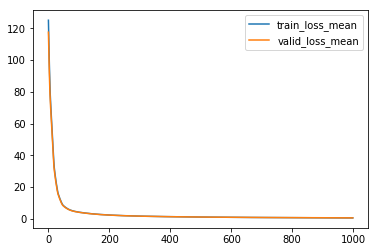

In [40]:
import matplotlib.pyplot as mplot
%matplotlib inline

mplot.plot(train_loss_mean, label='train_loss_mean')
mplot.plot(valid_loss_mean, label='valid_loss_mean')
mplot.legend()

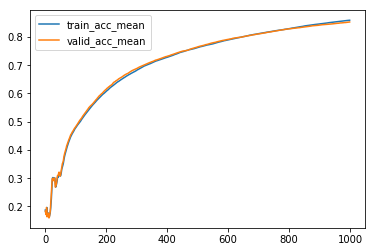

In [41]:
mplot.plot(train_acc_mean, label='train_acc_mean')
mplot.plot(valid_acc_mean, label='valid_acc_mean')
mplot.legend()

In [42]:
with tf.Session() as sess:
    sess.run(fetches=tf.global_variables_initializer())
    
    # Loading the trained and validated model
#     saver.restore(save_path=tf.train.latest_checkpoint(checkpoint_dir='checkpoints/'), sess=sess)
    saver.restore(save_path='checkpoints/mlp-fnirs-har-10subjects.ckpt', sess=sess)
    
    # Saving the test loss for every batch/minibtch
    test_loss, test_acc = [], []
    
    # applying the loaded model on test data
    for Xarr, Yarr in get_batches(X=Xtest, Y=Ytest, batch_size=Xvalid.shape[0]): 
        # X_NxWXCin, Y_NxCout
        feed_dict={X:Xarr, Y:Yarr}
        lossarr, accarr = sess.run(feed_dict=feed_dict, fetches=[loss, acc])
        test_loss.append(lossarr)
        test_acc.append(accarr)
        
    # Printing the test loss
    print('test_loss:', np.mean(test_loss), 'test acc', np.mean(test_acc))

INFO:tensorflow:Restoring parameters from checkpoints/mlp-fnirs-har-10subjects.ckpt
test_loss: 0.65276283 test acc 0.84663796
